# Pseudorapidity Resolution

 At CERN particles are accelerated and collided with the LHC (Large Hadron Collider) particle accelerator. With the CMS detector the new particles created in these collisions can be observed and measured. There is the opened CMS detector in the picture below. [https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg]
<img src="CMS1.png" width="500" height="400">

The pseudorapidity is a function of $\theta$, $\eta = -\ln\big|\tan \big(\frac{\theta}{2}\big)\big|$, where $\theta$ is defined as the angle from the z-axis in the xz-plane. 
<img src="CMS2.png" width="400" height="400"> 
We can consider the invariant mass (M) from $\sqrt{2p_{T1}p_{T2}(\cosh(\eta_1 - \eta_2) - \cos(\phi_1 - \phi_2) }$.

# 1. จงแสดงกราฟระหว่าง Pseudorapidity และ $\theta$ เมื่อ $1^{\circ}\leq\theta\leq90^{\circ}$

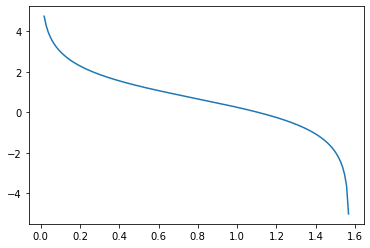

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Final.csv")

x = np.arange(np.pi/180,np.pi/2,0.01)
y = -np.log(np.tan(x)/2)

plt.plot(x,y)
plt.show()

# 2. จงแสดงวิธีการวิเคราะห์ข้อมูลและเติมข้อมูลลงในตารางต่อไปนี้
 | Pseudorapidity      | Entries | The average mass (GeV) | The standard deviation (GeV)    |
 | :---    |  :---       |    :----:   |          ---: |
 | $|\eta|$ $\leq$ 0.5     | $N_1$ | $M_1$   |  $\sigma_1$   |
 | 0.5 < $|\eta|$ $\leq$ 1.0 | $N_2$  |   $M_2$     |  $\sigma_2$   |  
 | 1.0 < $|\eta|$ $\leq$ 2.0   | $N_3$ |  $M_3$     |  $\sigma_3$   |
 | 2.0 < $|\eta|$ $\leq$ 3.0   | $N_4$ | $M_4$     |  $\sigma_4$   |
 | 3.0 < $|\eta|$   | $N_5$ | $M_5$      |  $\sigma_5$   |



In [2]:


invariant_mass = np.sqrt(2*data.pt1*data.pt2*(np.cosh(data.eta1 - data.eta2) - np.cos(data.phi1 - data.phi2)))
dataset = data.assign(M=invariant_mass)
dataset.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,M
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,89.885919
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,88.812177
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,88.474683
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,90.332429
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,90.515882


In [3]:
pseudorapidity1 = np.abs(-np.log(np.tan(data.eta1)/2 ) )
pseudorapidity2 = np.abs(-np.log(np.tan(data.eta2)/2 ) )
dataset = dataset.assign(nu1=pseudorapidity1)
dataset = dataset.assign(nu2=pseudorapidity2)

newdata1 = dataset[(dataset.nu1 >= 0) & (dataset.nu1 <= 0.5) & (dataset.nu2 >= 0) & (dataset.nu2 <= 0.5)]
newdata2 = dataset[(dataset.nu1 > 0.5) & (dataset.nu1 <= 1.0) & (dataset.nu2 > 0.5) & (dataset.nu2 <= 1.0)]
newdata3 = dataset[(dataset.nu1 > 1.0) & (dataset.nu1 <= 2.0) & (dataset.nu2 > 1.0) & (dataset.nu2 <= 2.0)]
newdata4 = dataset[(dataset.nu1 > 2.0) & (dataset.nu1 <= 3.0) & (dataset.nu2 > 2.0) & (dataset.nu2 <= 3.0)]
newdata5 = dataset[(dataset.nu1 > 3.0) & (dataset.nu2 > 3.0) ]


newdata1.M.mean()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


87.74986668285794

In [4]:
newdata2.M.mean()

87.74076915874397

In [5]:
newdata3.M.mean()

88.79435284846176

In [6]:
newdata4.M.mean()

86.77498165108685

In [7]:
newdata5.M.mean()

88.33097143033967

In [8]:
newdata1.M.std()

9.70071758692747

In [9]:
newdata2.M.std()

8.451124446898453

In [10]:
newdata3.M.std()

8.677146524913892

In [11]:
newdata4.M.std()

10.238237596754411

In [12]:
newdata5.M.std()

4.987366053545505

# 3. จงพล็อตกราฟระหว่าง Pseudorapidity vs The average mass (GeV)

In [13]:
x1 = ['$|\eta|\leq0.5$', '$0.5<|\eta|\leq1.0$','$1.0<|\eta|\leq2.0$', '$2.0<|\eta|\leq3.0$', '$3.0<|\eta|$']
y1 = []

# 4. จงพล็อตกราฟระหว่าง Pseudorapidity vs The standard deviation (GeV)

In [14]:
x1 = ['$|\eta|\leq0.5$', '$0.5<|\eta|\leq1.0$','$1.0<|\eta|\leq2.0$', '$2.0<|\eta|\leq3.0$', '$3.0<|\eta|$']
y2 = []

# 5. จากกราฟในข้อ 2 และ 3 จงวิเคราะห์ผลจากการทดลองข้างต้น

## วิธีการส่งไฟล์ --> ไปที่ File --> Download as --> HTML (.html) หรือ Notebook (.ipynb) --> ส่งใน GG Classroom